In [95]:
import pandas as pd

In [96]:
df=pd.read_csv('data_dummy_var.csv')

In [97]:
df

,town,feet,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [98]:
df.town

0     monroe township
1     monroe township
2     monroe township
3     monroe township
4     monroe township
5        west windsor
6        west windsor
7        west windsor
8        west windsor
9         robinsville
10        robinsville
11        robinsville
12        robinsville
Name: town, dtype: object

In [99]:
dummies=pd.get_dummies(df.town)

In [100]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [101]:
merger=pd.concat([df,dummies],axis='columns')

In [102]:
merger

,town,feet,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [103]:
final=merger.drop(['town'],axis='columns')

In [104]:
final['robinsville']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
Name: robinsville, dtype: uint8

In [107]:
final=final.drop(['west windsor'],axis='columns')

In [108]:
final

,feet,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model=LinearRegression()

In [111]:
X = final.drop('price', axis='columns')
X

,feet,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [112]:
y=final.price

In [113]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [114]:
model.fit(X,y)

LinearRegression()

In [117]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [118]:
model.score(X,y)

0.9573929037221873

In [158]:
model.predict([[2600,1,0]])

array([67034460.33110953])

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
lb=LabelEncoder()

In [125]:
dfle=df
dfle.town=lb.fit_transform(dfle.town)

In [126]:
dfle

,town,feet,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [133]:
X=dfle[['town','feet']].values

In [134]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [131]:
y=dfle.price.values

In [132]:
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [135]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
from sklearn.compose import ColumnTransformer

In [139]:
clm=ColumnTransformer([('town',OneHotEncoder(),[0])],remainder='passthrough')

In [140]:
clm

ColumnTransformer(remainder='passthrough',
                  transformers=[('town', OneHotEncoder(), [0])])

In [141]:
X=clm.fit_transform(X)

In [143]:
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [146]:
X=X[:,1:]

In [147]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [148]:
model.fit(X,y)

LinearRegression()

In [152]:
model.predict([[0,0,2600]])

array([539709.7398409])

In [153]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


AttributeError: 'numpy.ndarray' object has no attribute 'values'

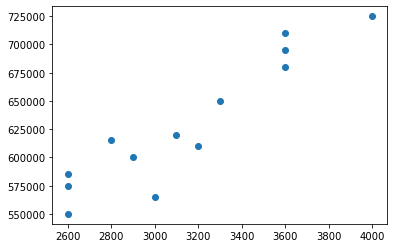

In [160]:
plt.scatter(df.feet,df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcf5045100>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcf5045790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcf5035e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1fcf5045e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fcf50501f0>],
 'means': []}

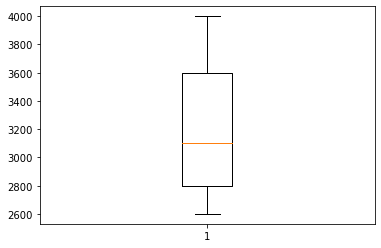

In [163]:
plt.boxplot(df.feet)